## Pipeline: Clean Continuous Features

Using the Titanic dataset from [this](https://www.kaggle.com/c/titanic/overview) Kaggle competition.

This dataset contains information about 891 people who were on board the ship when departed on April 15th, 1912. As noted in the description on Kaggle's website, some people aboard the ship were more likely to survive the wreck than others. There were not enough lifeboats for everybody so women, children, and the upper-class were prioritized. Using the information about these 891 passengers, the challenge is to build a model to predict which people would survive based on the following fields:

- **Name** (str) - Name of the passenger
- **Pclass** (int) - Ticket class
- **Sex** (str) - Sex of the passenger
- **Age** (float) - Age in years
- **SibSp** (int) - Number of siblings and spouses aboard
- **Parch** (int) - Number of parents and children aboard
- **Ticket** (str) - Ticket number
- **Fare** (float) - Passenger fare
- **Cabin** (str) - Cabin number
- **Embarked** (str) - Port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

**This notebook will implement some of the cleaning that was done in Section 2: EDA & Data Cleaning**

![Clean Data](img/01-clean_data.png)

# Read in Data

In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline

titanic = pd.read_csv('titanic.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Clean Continous Features

### Clean continuous variables
1. Fill in missing values for `Age`
2. Combine `SibSp` & `Parch`
3. Drop irrelevant/repetitive variables (`SibSp`, `Parch`, `PassengerId`)

#### Fill missing for `Age`

In [36]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [37]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace = True)

#### Combine `SibSp` & `Parch`

<Figure size 432x288 with 0 Axes>

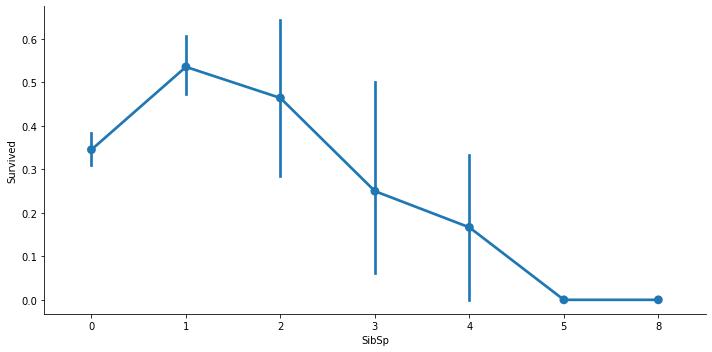

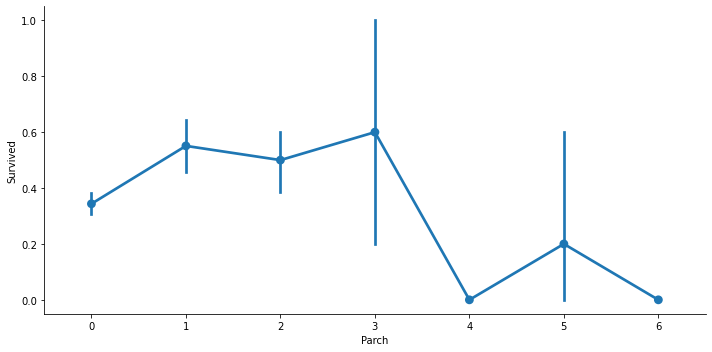

In [38]:
for i, col in enumerate(['SibSp', 'Parch']):
    plt.figure(i)
    sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2, )

In [39]:
titanic['Family'] = titanic['SibSp'] + titanic['Parch']

#### Drop unnnecessary variables

In [40]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

In [41]:
titanic.head(10)

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,A/5 21171,7.2500,NaN,S,1
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,PC 17599,71.2833,C85,C,1
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,STON/O2. 3101282,7.9250,NaN,S,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,113803,53.1000,C123,S,1
4,0,3,"Allen, Mr. William Henry",male,35.000000,373450,8.0500,NaN,S,0
5,0,3,"Moran, Mr. James",male,29.699118,330877,8.4583,NaN,Q,0
6,0,1,"McCarthy, Mr. Timothy J",male,54.000000,17463,51.8625,E46,S,0
7,0,3,"Palsson, Master. Gosta Leonard",male,2.000000,349909,21.0750,NaN,S,4
8,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.000000,347742,11.1333,NaN,S,2
9,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.000000,237736,30.0708,NaN,C,1


### Write out cleaned data

In [42]:
titanic.to_csv('tmp/titanic_cleaned.csv', index=False)

# Clean Categorical Features

### Clean categorical variables
1. Create an indicator variable in place of `Cabin`
2. Convert `Sex` to a numeric variable
3. Drop irrelevant/repetitive variables (`Cabin`, `Embarked`, `Name`, `Ticket`)

#### Create indicator for `Cabin`

In [43]:
# 0 is Cabin not assigned
# 1 is cabin assigned
titanic['CabinInd'] = np.where(titanic['Cabin'].isnull(), 0, 1)
titanic.head()

,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Cabin,Embarked,Family,CabinInd
0,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,NaN,S,1,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C85,C,1,1
2,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,NaN,S,0,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,C123,S,1,1
4,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,NaN,S,0,0


#### Convert `Sex` to numeric

In [44]:
gender_code = {'male': 0, 'female': 1}
titanic['Sex'] = titanic['Sex'].map(gender_code)

#### Drop unnecessary variables

In [45]:
titanic.drop(['Cabin', 'Embarked', 'Name', 'Ticket'], axis=1, inplace=True)
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family,CabinInd
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Write out cleaned data

In [46]:
titanic.to_csv('tmp/titanic_cleaned.csv', index=False)

# Split Data

### Read in Data

In [47]:
from sklearn.model_selection import train_test_split
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family,CabinInd
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


### Split into train, validation, and test set

![Split Data](img/02-split_data.png)

In [50]:
## Seperate Features and Labels
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

## Seperate 60% Train and 40% Test Data
ftr_train, ftr_tests, lbl_train, lbl_tests = train_test_split(features, labels, test_size = 0.4, random_state = 42)

## Seperate 20% Test and 20% Validation data
ftr_val, ftr_test, lbl_val, lbl_test = train_test_split(ftr_tests, lbl_tests, test_size = 0.5, random_state = 42)

In [51]:
for dataset in [lbl_train, lbl_val, lbl_test]:
    print(round((len(dataset) / len(labels))*100))

60
20
20


### Write out data

In [53]:
ftr_train.to_csv('tmp/train_features.csv', index=False)
ftr_val.to_csv('tmp/val_features.csv', index=False)
ftr_test.to_csv('tmp/test_features.csv', index=False)

lbl_train.to_csv('tmp/train_labels.csv', index=False)
lbl_val.to_csv('tmp/val_labels.csv', index=False)
lbl_test.to_csv('tmp/test_labels.csv', index=False)

# Fit a basic model

### Initialise

In [54]:
from sklearn.ensemble import RandomForestClassifier ## Classifier
from sklearn.model_selection import cross_val_score ## K Fold Cross Validation 
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Fit and evaluate a basic model using 5-fold Cross-Validation

![CV Image](img/K-Fold.png)

In [60]:
## Initialize RandomForestClassifier
rf = RandomForestClassifier()

## Now call Cross Val Score on Training Data
## 1st Arg is Classifier
## 2nd Arg is Feature
## 3rd Arg is Label in Array form. But our label is in Pandas Column form 
## so use Ravel method to convert it into Array
## 4th Arg is number of Folds i.e. K
score = cross_val_score(rf, ftr_train, lbl_train.values.ravel(), cv = 5)

## Print Score, this output accuracy for all 5 folds
print(score)

[0.82242991 0.81308411 0.80373832 0.79439252 0.83018868]


# Tune Hyperparameters

![Tune Hyperparameters](img/04-tune_hyperparameters.png)
### Import Modules

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV ## Wrapper on Cross_Val_Score which does Grid Search in CV

### Hyperparameter tuning

![Hyperparameters](img/hyperparameters.png)

In [62]:
## Function to output Results of GridSearch in more readable Form
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [63]:
## Create Classifier
rf = RandomForestClassifier()

## Select some values for HyperParameters
### n_estimators is Number of Decision Trees in RandomForest
### max_depth is maximum depth of a tree (None is use inbuilt method to stop)
parameters = {
    'n_estimators': [5, 50, 100],
    'max_depth': [2, 10, 20, None]
}

## Create GridSearch Cross Validation 
cv = GridSearchCV(rf, parameters, cv = 5)

## Fit model to training datasets
cv.fit(ftr_train, lbl_train.values.ravel())

## For 3 (Estimators) + 4 (Depth) = 12 (Different types of Decision Trees) model run 5 Fold CV
## i.e. total 60 Models internally

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 50}

0.794 (+/-0.113) for {'max_depth': 2, 'n_estimators': 5}
0.787 (+/-0.121) for {'max_depth': 2, 'n_estimators': 50}
0.796 (+/-0.11) for {'max_depth': 2, 'n_estimators': 100}
0.811 (+/-0.111) for {'max_depth': 10, 'n_estimators': 5}
0.818 (+/-0.059) for {'max_depth': 10, 'n_estimators': 50}
0.815 (+/-0.058) for {'max_depth': 10, 'n_estimators': 100}
0.798 (+/-0.068) for {'max_depth': 20, 'n_estimators': 5}
0.809 (+/-0.032) for {'max_depth': 20, 'n_estimators': 50}
0.811 (+/-0.034) for {'max_depth': 20, 'n_estimators': 100}
0.796 (+/-0.05) for {'max_depth': None, 'n_estimators': 5}
0.813 (+/-0.02) for {'max_depth': None, 'n_estimators': 50}
0.805 (+/-0.03) for {'max_depth': None, 'n_estimators': 100}


# Evaluate results on validation set

![Eval on Validation](img/05-evaluate_on_validation.png)
### Import Modules

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

### Lets Create Classifiers and fit on top 3 hyperparameters

In [65]:
rf1 = RandomForestClassifier(n_estimators = 50, max_depth = 10)
rf1.fit(ftr_train, lbl_train.values.ravel())

rf2 = RandomForestClassifier(n_estimators = 100, max_depth = 10)
rf2.fit(ftr_train, lbl_train.values.ravel())

rf3 = RandomForestClassifier(n_estimators = 50, max_depth = None)
rf3.fit(ftr_train, lbl_train.values.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

### Evaluate models on validation set

![Evaluation Metrics](img/eval_metrics.png)

In [66]:
## Loop over all 3 models to get score of each
for mdl in [rf1, rf2, rf3]:
    ## Generate Prediction of Models
    lbl_pred = mdl.predict(ftr_val)
    
    ## Calculate Accuracy of Model
    accuracy = round(accuracy_score(lbl_val, lbl_pred), 3)
    
    ## Calculate Precision of Model
    precision = round(precision_score(lbl_val, lbl_pred), 3)
    
    ## Calculate Recall of Models
    recall = round(recall_score(lbl_val, lbl_pred), 3)
    print(f'MAX DEPTH: {mdl.max_depth} / # OF EST: {mdl.n_estimators} -- A: {accuracy} / P: {precision} / R: {recall}')

MAX DEPTH: 10 / # OF EST: 50 -- A: 0.775 / P: 0.712 / R: 0.646
MAX DEPTH: 10 / # OF EST: 100 -- A: 0.792 / P: 0.75 / R: 0.646
MAX DEPTH: None / # OF EST: 50 -- A: 0.781 / P: 0.717 / R: 0.662


# Evaluate the best model on the test set

![Final Model](img/06-final_model_selection.png)

In [69]:
## Now rf2 is best performed model out of all in above case. So we will continue with rf2
lbl_pred = rf2.predict(ftr_test)
accuracy = round(accuracy_score(lbl_test, lbl_pred), 3)
precision = round(precision_score(lbl_test, lbl_pred), 3)
recall = round(recall_score(lbl_test, lbl_pred), 3)
print(f'MAX DEPTH: {rf2.max_depth} / # OF EST: {rf2.n_estimators} -- A: {accuracy} / P: {precision} / R: {recall}')

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.832 / P: 0.859 / R: 0.724
